# Eksplorujemy modele `text-to-embeddings`: `openai/text-embedding-3-small` oraz `openai/text-embedding-3-large`

## Czym są text embeddings?

* Text embeddings to reprezentacja tekstu w przestrzeni wektorowej.
* Pozwalają na reprezentację tekstu w taki sposób, aby zachować jego semantykę (czyli znaczenie).
* Mówiąc po ludzku potrafimy zamienić tekst na wektor (ciąg liczb), który zachowuje znaczenie tekstu.
* Możemy wówczas wykonywać operacje na tych wektorach, np. obliczać podobieństwo między tekstami!

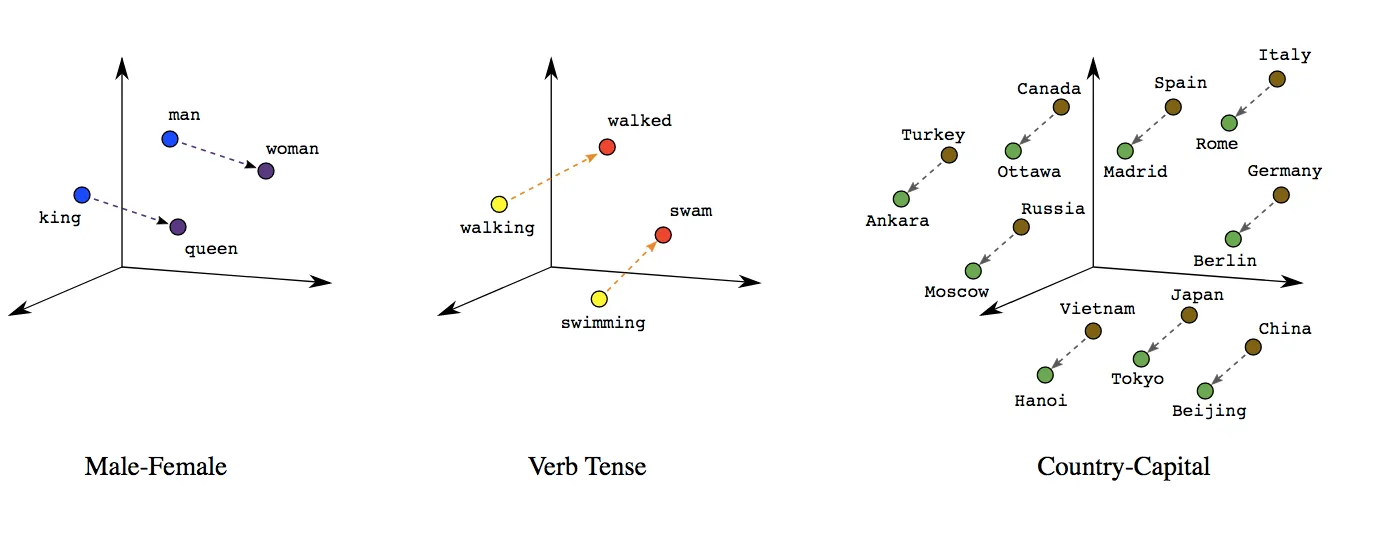
źródła: developers.google.com

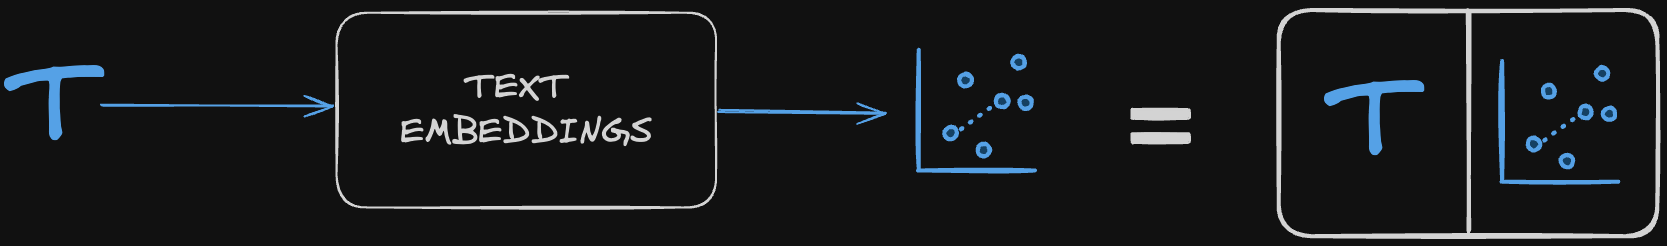



## Instalujemy wymagane biblioteki (conda wymagana)

- otwórz terminal
- uruchom `conda activate od_zera_do_ai`
- uruchom `conda install -y openai==1.47.0 python-dotenv`

In [ ]:
from dotenv import dotenv_values
from openai import OpenAI
import numpy as np

In [ ]:
env = dotenv_values(".env")

openai_client = OpenAI(api_key=env["OPENAI_API_KEY"])

## Jak tworzyć embeddings-y?

In [ ]:
# embedding_model = "text-embedding-3-small"
embedding_model = "text-embedding-3-large"

result = openai_client.embeddings.create(
    input=[
        "Dawno temu w trawie",
        "Gdzieś na końcu świata",
        "W krainie czarów",
    ],
    model=embedding_model,
)

In [ ]:
len(result.data)

In [ ]:
len(result.data[0].embedding)

In [ ]:
result.data[0].embedding[:10]

In [ ]:
def calculate_embedding(text):
    result = openai_client.embeddings.create(
        input=[text],
        model=embedding_model,
    )

    return np.array(result.data[0].embedding)

## Jak obliczać odległości w przestrzeni embeddings?

* Jednym ze sposobów / miar obliczania odległości w przestrzeni embeddings jest tzw. **Cosine Similarity**.
* **Cosine Similarity** (pol. podobieństwo cosinusowe) to sposób mierzenia, jak podobne są do siebie dwa wektory (czyli listy liczb) w przestrzeni. Wektorami mogą być np. zdania, dokumenty lub inne dane, które możemy przekształcić na liczby.
* Cosine similarity sprawdza, jak "zbliżone" są do siebie kierunki dwóch wektorów, a nie ich długości.

In [ ]:
a = np.array([1, 2])
b = np.array([1, 4])
np.dot(a, b)

In [ ]:
np.linalg.norm(a)

In [ ]:
np.linalg.norm(b)

In [ ]:
np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

In [ ]:
def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

cosine_similarity(a, b)

Cosine similarity przyjmuje wartości od -1 (całkowita różność) przez 0 (brak podobieństwa) do 1 (pełna zgodność), a zakres ten pozwala określić stopień podobieństwa między dwoma wektorami.

In [ ]:
cosine_similarity(np.array([2, 1]), np.array([2, 1]))

In [ ]:
cosine_similarity(np.array([-1, 1]), np.array([1, 1]))

In [ ]:
cosine_similarity(np.array([-1, -1]), np.array([1, 1]))

## Szukanie podobieństw - język polski

In [ ]:
zdania_niepodobne = [
    [
        "Orzeł wznosi się wysoko na niebie, śledząc swoje ofiary.",
        "W najnowszej wersji systemu operacyjnego dodano kilka istotnych funkcji.",
    ],
    [
        "Zachód słońca nad oceanem jest jednym z najpiękniejszych widoków na świecie.",
        "Matematyka to królowa nauk, pełna złożonych teorii i wzorów.",
    ]
]
zdania_podobne = [
    [
        "Wiosną kwiaty zaczynają kwitnąć, a drzewa pokrywają się liśćmi.",
        "Latem drzewa są pełne liści, a kwiaty rozkwitają na łąkach."
    ],
    [
        "Kot lubi siedzieć na ciepłym parapecie i patrzeć przez okno.",
        "Pies często spędza czas leżąc na dywanie, obserwując otoczenie.",
    ],
]

In [ ]:
zdanie_a, zdanie_b = zdania_niepodobne[0]

a = calculate_embedding(zdanie_a)
b = calculate_embedding(zdanie_b)

print("zdanie_a:", zdanie_a)
print("zdanie_b:", zdanie_b)
cosine_similarity(a, b)

In [ ]:
zdanie_a, zdanie_b = zdania_niepodobne[1]

a = calculate_embedding(zdanie_a)
b = calculate_embedding(zdanie_b)

print("zdanie_a:", zdanie_a)
print("zdanie_b:", zdanie_b)
cosine_similarity(a, b)

In [ ]:
zdanie_a, zdanie_b = zdania_podobne[0]

a = calculate_embedding(zdanie_a)
b = calculate_embedding(zdanie_b)

print("zdanie_a:", zdanie_a)
print("zdanie_b:", zdanie_b)
cosine_similarity(a, b)

In [ ]:
zdanie_a, zdanie_b = zdania_podobne[1]

a = calculate_embedding(zdanie_a)
b = calculate_embedding(zdanie_b)

print("zdanie_a:", zdanie_a)
print("zdanie_b:", zdanie_b)
cosine_similarity(a, b)

## Szukanie podobieństw - język polski vs język angielski

In [ ]:
zdania_niepodobne = [
    [
        "Nowoczesne miasta rozwijają się w szybkim tempie, przekształcając krajobraz urbanistyczny.",
        "The quantum mechanics theory revolutionized the understanding of subatomic particles.",
    ],
    [
        "Długi spacer po lesie uspokaja umysł i pozwala na chwilę oddechu.",
        "Artificial intelligence is rapidly transforming industries and creating new possibilities.",
    ],
]
zdania_podobne = [
    [
        "Książka opowiada o przygodach młodego chłopca, który odkrywa magiczny świat.",
        "The book tells the story of a young boy who discovers a magical world.",
    ],
    [
        "Zegar na wieży kościelnej wybija godzinę dwunastą, a dzwony rozbrzmiewają po całej wiosce.",
        "The church tower clock strikes twelve, and the bells echo throughout the village.",
    ],
]

In [ ]:
zdanie_a, zdanie_b = zdania_niepodobne[0]

a = calculate_embedding(zdanie_a)
b = calculate_embedding(zdanie_b)

print("zdanie_a:", zdanie_a)
print("zdanie_b:", zdanie_b)
cosine_similarity(a, b)

In [ ]:
zdanie_a, zdanie_b = zdania_niepodobne[1]

a = calculate_embedding(zdanie_a)
b = calculate_embedding(zdanie_b)

print("zdanie_a:", zdanie_a)
print("zdanie_b:", zdanie_b)
cosine_similarity(a, b)

In [ ]:
zdanie_a, zdanie_b = zdania_podobne[0]

a = calculate_embedding(zdanie_a)
b = calculate_embedding(zdanie_b)

print("zdanie_a:", zdanie_a)
print("zdanie_b:", zdanie_b)
cosine_similarity(a, b)

In [ ]:
zdanie_a, zdanie_b = zdania_podobne[1]

a = calculate_embedding(zdanie_a)
b = calculate_embedding(zdanie_b)

print("zdanie_a:", zdanie_a)
print("zdanie_b:", zdanie_b)
cosine_similarity(a, b)